# Libraries

In [1]:
import sys
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
body = pd.read_csv("data/nhanes_adult_female_bmx_2020.csv", comment="#")
world = pd.read_csv("data/world_factbook_2020_subset1.csv", comment="#")

In [3]:
body.iloc[:10, :]

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
5,62.0,144.7,32.5,34.2,29.8,106.7,84.8
6,66.2,166.5,37.5,37.6,32.0,96.3,95.7
7,75.9,154.5,35.4,37.6,32.7,107.7,98.7
8,77.2,159.2,38.5,40.5,35.7,102.0,97.5
9,91.6,174.5,36.1,45.9,35.2,121.3,100.3


In [4]:
body_columns = np.array(body.columns.tolist())
print(f"before: {body_columns}")
body_columns = np.char.replace(body_columns, "BMX", "")
print(f"after:  {body_columns}")

before: ['BMXWT' 'BMXHT' 'BMXARML' 'BMXLEG' 'BMXARMC' 'BMXHIP' 'BMXWAIST']
after:  ['WT' 'HT' 'ARML' 'LEG' 'ARMC' 'HIP' 'WAIST']


In [5]:
body = np.array(body)
print(f"shape = {body.shape}\n")
print(body[:10, :])

shape = (4221, 7)

[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]
 [ 62.  144.7  32.5  34.2  29.8 106.7  84.8]
 [ 66.2 166.5  37.5  37.6  32.   96.3  95.7]
 [ 75.9 154.5  35.4  37.6  32.7 107.7  98.7]
 [ 77.2 159.2  38.5  40.5  35.7 102.   97.5]
 [ 91.6 174.5  36.1  45.9  35.2 121.3 100.3]]


# Correlation coefficients

In [6]:
def plot_corr(x, y, axes_eq=False):
    r = scipy.stats.pearsonr(x, y)[0]
    rho = scipy.stats.spearmanr(x,y)[0]
    plt.plot(x, y, "o")
    plt.title(f"$r = {r:.3}$, $\\rho = {rho:.3}$",
              fontdict=dict(fontsize=15))
    if axes_eq: plt.axis("equal")

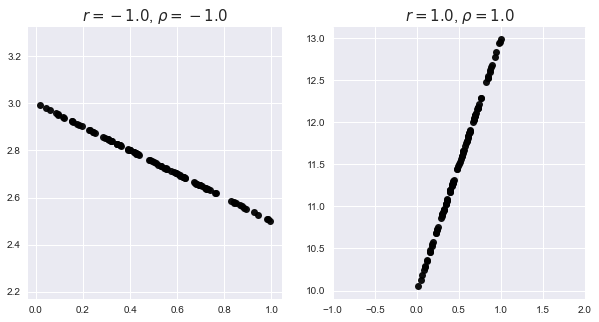

In [7]:
x = np.random.rand(100)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_corr(x, -0.5*x+3, axes_eq=True)

plt.subplot(1, 2, 2)
plot_corr(x, 3*x+10, axes_eq=True)

plt.show()

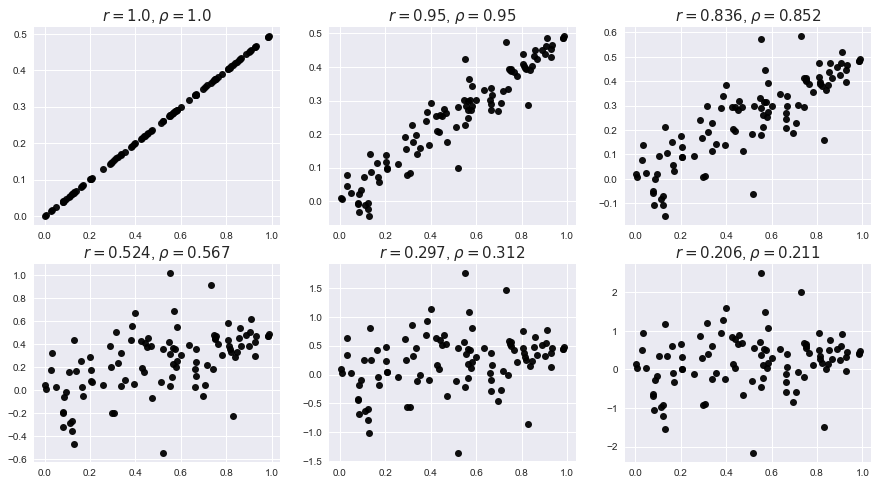

In [8]:
x = np.random.rand(100) # x = random values
y = 0.5*x # y = linear function of x
e = np.random.randn(len(x)) # e = random Gaussian noise (expected value 0)

plt.figure(figsize=(15, 8))
for i_plot, noise_level in enumerate([0, 0.05, 0.1, 0.25, 0.5, 0.75]):
    plt.subplot(2, 3, i_plot+1)
    plot_corr(x, y + noise_level*e)
plt.show()

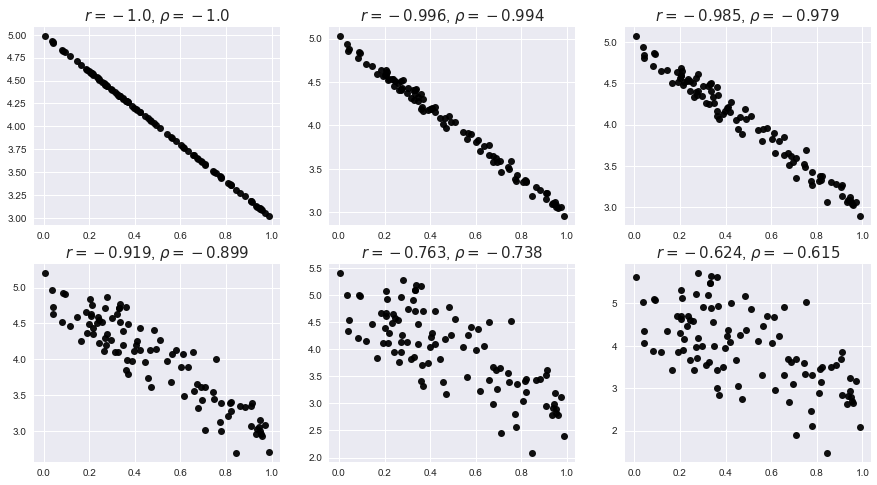

In [9]:
x = np.random.rand(100) # x = random values
y = -2*x + 5 # y = linear function of x
e = np.random.randn(len(x)) # e = random Gaussian noise (expected value 0)

plt.figure(figsize=(15, 8))
for i_plot, noise_level in enumerate([0, 0.05, 0.1, 0.25, 0.5, 0.75]):
    plt.subplot(2, 3, i_plot+1)
    plot_corr(x, y + noise_level*e)
plt.show()

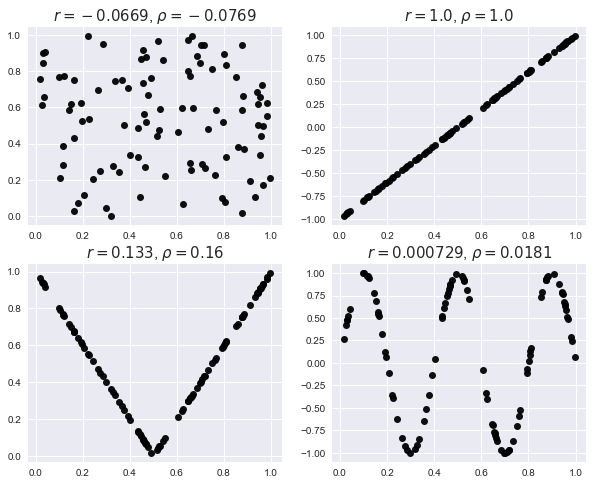

In [10]:
x = np.random.rand(100) # x = random values

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plot_corr(x, np.random.rand(100)) # independent (not correlated)

plt.subplot(2, 2, 2)
plot_corr(x, 2*x-1**2) # quadratic dependence

plt.subplot(2, 2, 3)
plot_corr(x, np.abs(2*x-1)) # absolute value

plt.subplot(2, 2, 4)
plot_corr(x, np.sin(5*np.pi*x)) # sine

plt.show()

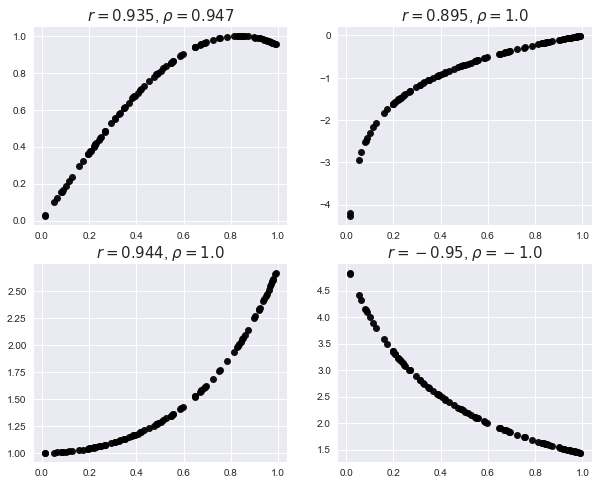

In [11]:
# False correlations: when data are functionally dependent,
# but the relationship is not linear. It kind of looks like linear.

x = np.random.rand(100) # x = random values

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plot_corr(x, np.sin(0.6*np.pi*x)) # sine

plt.subplot(2, 2, 2)
plot_corr(x, np.log(x)) # logarithm

plt.subplot(2, 2, 3);
plot_corr(x, np.exp(x**2)) # exponential of square

plt.subplot(2, 2, 4)
plot_corr(x, 1/(x/2+0.2)) # reciprocal

plt.show()

# Linear correlation coefficient

In [12]:
# Pearson linear correlation coefficient
print(scipy.stats.pearsonr(body[:, 4], body[:, 5]))

print(scipy.stats.pearsonr(body[:, 4], body[:, 5])[0])

print(scipy.stats.pearsonr(body[:, 4], body[:, 5])[1])

PearsonRResult(statistic=0.8680627457873241, pvalue=0.0)
0.8680627457873241
0.0


In [13]:
# Correlation coefficient matrix (Pearson coefficients)
R = np.corrcoef(body, rowvar=False)
print(np.round(R, 2))

[[ 1.    0.35  0.55  0.19  0.91  0.95  0.9 ]
 [ 0.35  1.    0.67  0.66  0.15  0.2   0.13]
 [ 0.55  0.67  1.    0.48  0.45  0.46  0.43]
 [ 0.19  0.66  0.48  1.    0.08  0.1  -0.03]
 [ 0.91  0.15  0.45  0.08  1.    0.87  0.85]
 [ 0.95  0.2   0.46  0.1   0.87  1.    0.9 ]
 [ 0.9   0.13  0.43 -0.03  0.85  0.9   1.  ]]


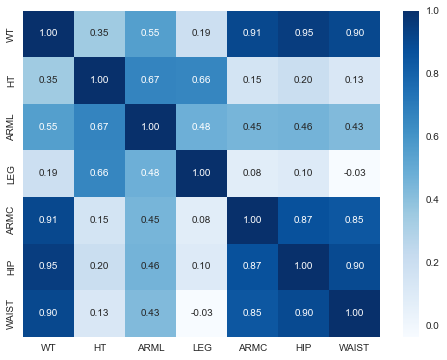

In [14]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    R,
    xticklabels=body_columns,
    yticklabels=body_columns,
    annot=True,
    fmt=".2f",
    cmap="Blues")
plt.show()

# Rank correlation coefficient

In [15]:
# Spearman's rank correlation coefficient
print(scipy.stats.spearmanr(body[:, 4], body[:, 5]))

print(scipy.stats.spearmanr(body[:, 4], body[:, 5])[0])

print(scipy.stats.spearmanr(body[:, 4], body[:, 5])[1])

SignificanceResult(statistic=0.873839031167527, pvalue=0.0)
0.873839031167527
0.0


In [16]:
# Correlation coefficient matrix (Spearman coefficients)
R_rank = np.corrcoef(scipy.stats.rankdata(body, axis=0), rowvar=False)
print(np.round(R_rank, 2))

[[ 1.    0.34  0.54  0.2   0.91  0.95  0.9 ]
 [ 0.34  1.    0.67  0.65  0.14  0.21  0.11]
 [ 0.54  0.67  1.    0.46  0.42  0.45  0.4 ]
 [ 0.2   0.65  0.46  1.    0.08  0.12 -0.04]
 [ 0.91  0.14  0.42  0.08  1.    0.87  0.84]
 [ 0.95  0.21  0.45  0.12  0.87  1.    0.89]
 [ 0.9   0.11  0.4  -0.04  0.84  0.89  1.  ]]


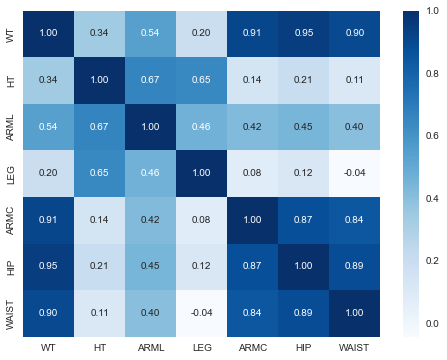

In [17]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    R_rank,
    xticklabels=body_columns,
    yticklabels=body_columns,
    annot=True,
    fmt=".2f",
    cmap="Blues")
plt.show()

In [18]:
# Check if it worked
print(scipy.stats.spearmanr(body[:, 6], body[:, 1])[0].round(2))
print(scipy.stats.spearmanr(body[:, 6], body[:, 3])[0].round(2))

0.11
-0.04


# Regression

In [19]:
print(body[:, 5])

[126.1 125.5 106.2 ... 104.6 102.4 121.4]


In [20]:
print(body[:, [5]])

[[126.1]
 [125.5]
 [106.2]
 ...
 [104.6]
 [102.4]
 [121.4]]


In [21]:
print(body[:, [5]]**[1, 0]) # this is a way to append a column of 1s to a matrix

[[126.1   1. ]
 [125.5   1. ]
 [106.2   1. ]
 ...
 [104.6   1. ]
 [102.4   1. ]
 [121.4   1. ]]


In [22]:
X_train = body[:, [5]]**[1, 0] # hip circumference
y_train = body[:, 0] # weight

In [23]:
# Determine the least suqares solution
res = scipy.linalg.lstsq(X_train, y_train)

In [24]:
print(f"res:\n{res}")
print(f"\nCoefficients (least-squares solution):\n{res[0].round(2)}")
print(f"\nResidual:\n{res[1]}")

res:
(array([  1.3052463 , -65.10087248]), 203795.09972223698, 2, array([7165.77170623,    9.20240486]))

Coefficients (least-squares solution):
[  1.31 -65.1 ]

Residual:
203795.09972223698


In [25]:
c = res[0]
y_pred = c @ X_train.T

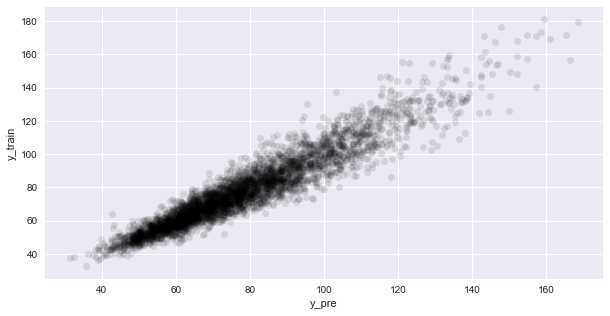

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_pred, y_train, "o", alpha=0.1)
plt.xlabel("y_pre")
plt.ylabel("y_train")
plt.show()

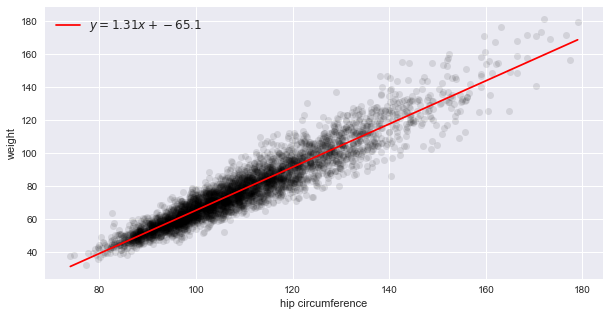

In [27]:
plt.figure(figsize=(10,5))

plt.plot(body[:, [5]], y_train, "o", alpha=0.1)

_x = np.linspace(body[:, [5]].min(), body[:, [5]].max(), 100)
_y = res[0][0]*_x + res[0][1]
lab_line = f"$y = {res[0][0]:.3}x + {res[0][1]:.3}$"
plt.plot(_x, _y, 'r-', label=lab_line)

plt.xlabel("hip circumference")
plt.ylabel("weight")
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [28]:
print(body[:, 5])
print(y_pred.round(2))
print(y_train)
print(body[:, 0])

[126.1 125.5 106.2 ... 104.6 102.4 121.4]
[99.49 98.71 73.52 ... 71.43 68.56 93.36]
[97.1 91.1 73.  ... 73.  78.6 82.8]
[97.1 91.1 73.  ... 73.  78.6 82.8]


# Residual

In [29]:
print(f"res:\n{res}")
print(f"\nCoefficients (least-squares solution):\n{res[0].round(2)}")
print(f"\nSum of squared residuals:\n{res[1]}")

res:
(array([  1.3052463 , -65.10087248]), 203795.09972223698, 2, array([7165.77170623,    9.20240486]))

Coefficients (least-squares solution):
[  1.31 -65.1 ]

Sum of squared residuals:
203795.09972223698


In [30]:
y_train

array([97.1, 91.1, 73. , ..., 73. , 78.6, 82.8])

In [31]:
def print_stats(y_pred, y):
    r = y_pred - y # residual
    print(f"Sum of squared residuals = {np.sum(r**2)}")
    print(f"RMSE (root mean squared error) = {np.sqrt(np.mean(r**2))}")
    print(f"MAE (mean absolute error) = {np.mean(np.abs(r))}")
    print(f"R-squared (coefficient of determination) = {1 - np.var(y-y_pred)/np.var(y)}")
    return r

In [32]:
r = print_stats(y_pred, y_train)

Sum of squared residuals = 203795.09972223692
RMSE (root mean squared error) = 6.948470091176111
MAE (mean absolute error) = 5.207073583769202
R-squared (coefficient of determination) = 0.8959634726270759


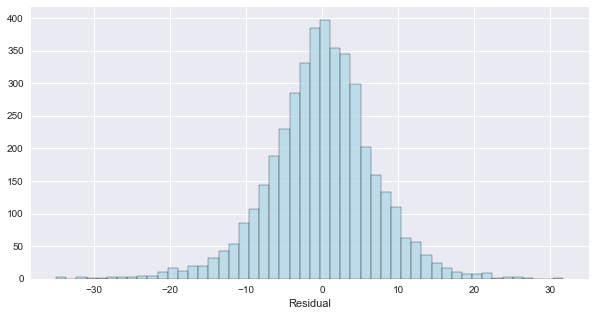

In [33]:
plt.figure(figsize=[10, 5])
sns.histplot(r, bins=50, color="lightblue")
plt.xlabel("Residual")
plt.ylabel(None)
plt.show()

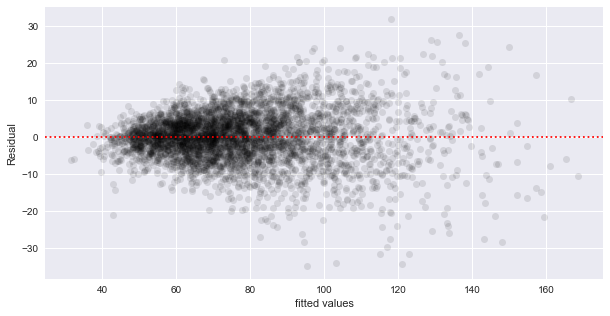

In [34]:
plt.figure(figsize=[10, 5])
plt.plot(y_pred, r, "o", alpha=0.1)
plt.axhline(0, ls=":", color="red")
plt.ylabel("Residual")
plt.xlabel("fitted values")
plt.show()

# Multiple regression

In [35]:
# Select arm and hip circumference
# and add a column of 1s in position 2
X_train = np.insert(body[:, [4, 5]], 2, 1, axis=1)
print(X_train[:6, :], end="\n\n")
y_train = body[:, 0] # weight
print(y_train[:6])

[[ 35.8 126.1   1. ]
 [ 38.5 125.5   1. ]
 [ 31.8 106.2   1. ]
 [ 29.  101.    1. ]
 [ 28.3  92.5   1. ]
 [ 29.8 106.7   1. ]]

[97.1 91.1 73.  61.7 55.4 62. ]


In [36]:
# Determine the least suqares solution
res = scipy.linalg.lstsq(X_train, y_train)

In [37]:
print(f"res:\n{res}")
print(f"\nCoefficients (least-squares solution):\n{res[0].round(2)}")
print(f"\nResidual:\n{res[1]}")

res:
(array([  1.30457807,   0.8986582 , -63.38342541]), 148092.01646291043, 3, array([7481.12559128,  173.6776435 ,    9.18169756]))

Coefficients (least-squares solution):
[  1.3    0.9  -63.38]

Residual:
148092.01646291043


In [38]:
y_pred = res[0] @ X_train.T
r = print_stats(y_pred, y_train)

Sum of squared residuals = 148092.01646291045
RMSE (root mean squared error) = 5.923223870044695
MAE (mean absolute error) = 4.431548244333893
R-squared (coefficient of determination) = 0.9243996585518783


# Polynomial models

1. $y = c_1 + c_2x$ (linear)
2. $y = c_1 + c_2x + c_3x^2$ (quadratic)
3. $y = c_1 + c_2x + c_3x^2 + c_4x^3$ (cubic)
4. $y = c_1 + c_2log(x)$ (logarithmic)

In [39]:
world.loc[:9, :]

,gdp_per_capita_ppp,life_expectancy_at_birth
0,2000,52.8
1,12500,79.0
2,15200,77.5
3,11200,74.8
4,49900,83.0
5,6800,61.3
6,12200,81.8
7,26400,77.3
8,20900,77.8
9,9500,75.6


In [40]:
x_original = np.array(world["gdp_per_capita_ppp"])
y_train = np.array(world["life_expectancy_at_birth"])

In [41]:
# This is a way to
# - Append a column of 1s to a matrix
# - Add x
# - Add x^2
print(x_original[:9].reshape(-1, 1)**[0, 1, 2])

[[         1       2000    4000000]
 [         1      12500  156250000]
 [         1      15200  231040000]
 [         1      11200  125440000]
 [         1      49900 2490010000]
 [         1       6800   46240000]
 [         1      12200  148840000]
 [         1      26400  696960000]
 [         1      20900  436810000]]


In [42]:
# This is a way to
# - Append a column of 1s to a matrix
# - Add the logarithm of x
(np.log(x_original[:9])).reshape(-1, 1)**[0, 1]

array([[ 1.        ,  7.60090246],
       [ 1.        ,  9.43348392],
       [ 1.        ,  9.62905071],
       [ 1.        ,  9.32366906],
       [ 1.        , 10.81777628],
       [ 1.        ,  8.82467789],
       [ 1.        ,  9.40919123],
       [ 1.        , 10.18111929],
       [ 1.        ,  9.94750444]])

In [43]:
# Functions to create model matrices
def make_model_matrix1(x):
    return x.reshape(-1, 1)**[0, 1]

def make_model_matrix2(x):
    return x.reshape(-1, 1)**[0, 1, 2]

def make_model_matrix3(x):
    return x.reshape(-1, 1)**[0, 1, 2, 3]

def make_model_matrix4(x):
    return (np.log(x)).reshape(-1, 1)**[0, 1]

make_model_matrix1.__name__ = "linear model"
make_model_matrix2.__name__ = "quadratic model"
make_model_matrix3.__name__ = "cubic model"
make_model_matrix4.__name__ = "logarithmic model"

model_matrix_makers = [
    make_model_matrix1,
    make_model_matrix2,
    make_model_matrix3,
    make_model_matrix4]

In [44]:
# Create all model matrices
Xs_train = [ make_model_matrix_i(x_original) for make_model_matrix_i in model_matrix_makers ]

In [45]:
print(f"lenght = {len(Xs_train)}\n")
print(f"First 9 rows of first matrix:\n {Xs_train[0][:9]}")

lenght = 4

First 9 rows of first matrix:
 [[    1  2000]
 [    1 12500]
 [    1 15200]
 [    1 11200]
 [    1 49900]
 [    1  6800]
 [    1 12200]
 [    1 26400]
 [    1 20900]]


In [46]:
# Fit the models
cs = [ scipy.linalg.lstsq(X_train, y_train)[0] for X_train in Xs_train ]

In [47]:
cs

[array([6.94365214e+01, 1.89845708e-04]),
 array([ 6.67465201e+01,  4.33542709e-04, -2.59049673e-09]),
 array([ 6.50014111e+01,  7.17380604e-04, -9.91893423e-09,  4.26765828e-14]),
 array([28.30638465,  4.81780579])]

In [48]:
cs[0]

array([6.94365214e+01, 1.89845708e-04])

In [49]:
print(model_matrix_makers[0].__name__)

linear model


In [50]:
R2_tmp = 0
i2 = 0
for i in range(len(Xs_train)):
    y_pred = cs[i] @ Xs_train[i].T
    R2 = 1 - np.var(y_train-y_pred) / np.var(y_train)
    if R2>R2_tmp:
        R2_tmp = R2
        i2 = i
    print(f"{model_matrix_makers[i].__name__:17} - R2 = {R2:.3f}")

print(f"\nBEST MODEL: {model_matrix_makers[i2].__name__}")

linear model      - R2 = 0.431
quadratic model   - R2 = 0.567
cubic model       - R2 = 0.607
logarithmic model - R2 = 0.651

BEST MODEL: logarithmic model


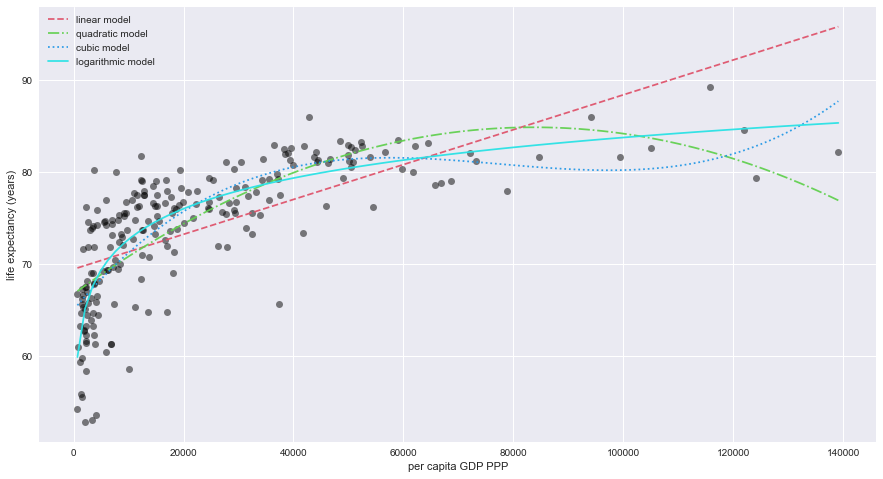

In [51]:
plt.figure(figsize=(15,8))
plt.plot(x_original, y_train, "o", alpha=0.5)
_x = np.linspace(x_original.min(), x_original.max(), 101).reshape(-1, 1)

for i in range(len(model_matrix_makers)):
    _y = cs[i] @ model_matrix_makers[i](_x).T
    plt.plot(_x, _y, label=model_matrix_makers[i].__name__)

plt.legend()
plt.xlabel("per capita GDP PPP")
plt.ylabel("life expectancy (years)")
plt.show()

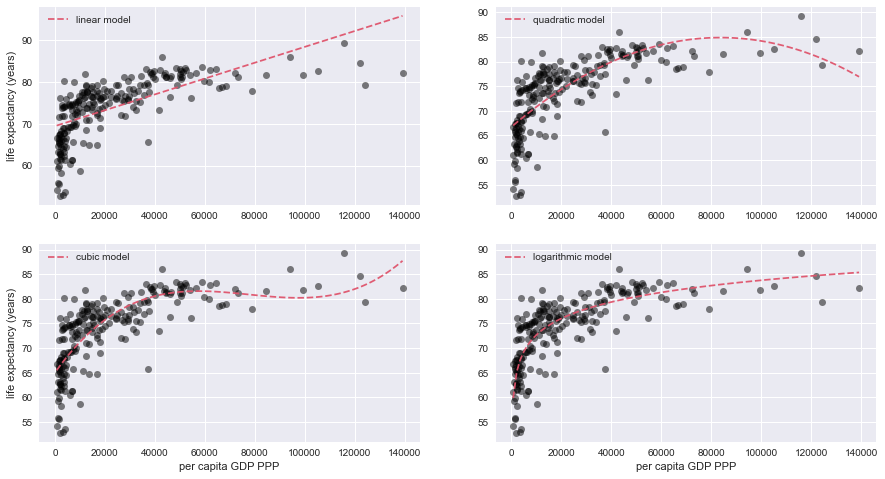

In [52]:
_x = np.linspace(x_original.min(), x_original.max(), 101).reshape(-1, 1)

plt.figure(figsize=(15,8))

for i in range(len(model_matrix_makers)):
    plt.subplot(2, 2, i+1)
    plt.plot(x_original, y_train, "o", alpha=0.5)
    _y = cs[i] @ model_matrix_makers[i](_x).T
    plt.plot(_x, _y, label=model_matrix_makers[i].__name__)
    plt.legend()
    if (i+1) > 2:
        plt.xlabel("per capita GDP PPP")
    if (i+1) % 2:
        plt.ylabel("life expectancy (years)")

plt.show()

In [53]:
rs = []
for i in range(len(Xs_train)):
    y_pred = cs[i] @ Xs_train[i].T
    print("-"*70 + "\n" + f"{model_matrix_makers[i].__name__}:")
    # r = print_stats(y_pred, y_train)
    rs.append(print_stats(y_pred, y_train))

----------------------------------------------------------------------
linear model:
Sum of squared residuals = 6632.10345705327
RMSE (root mean squared error) = 5.429181831978111
MAE (mean absolute error) = 4.372717894659869
R-squared (coefficient of determination) = 0.4309554152106646
----------------------------------------------------------------------
quadratic model:
Sum of squared residuals = 5049.733075648007
RMSE (root mean squared error) = 4.737431594650327
MAE (mean absolute error) = 3.58388143885049
R-squared (coefficient of determination) = 0.5667252056701424
----------------------------------------------------------------------
cubic model:
Sum of squared residuals = 4584.085012754087
RMSE (root mean squared error) = 4.513724755431587
MAE (mean absolute error) = 3.358010249434065
R-squared (coefficient of determination) = 0.6066785191773032
----------------------------------------------------------------------
logarithmic model:
Sum of squared residuals = 4071.19756881245

In [54]:
print(len(rs))
print(len(rs[0]))

4
225


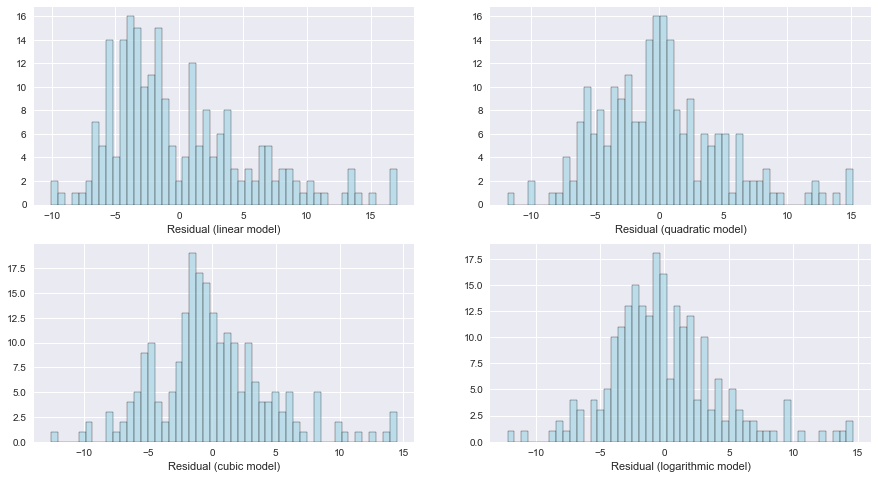

In [55]:
plt.figure(figsize=(15,8))

for i in range(len(rs)):
    plt.subplot(2, 2, i+1)
    sns.histplot(rs[i], bins=50, color="lightblue")
    plt.xlabel(f"Residual ({model_matrix_makers[i].__name__})")
    plt.ylabel(None)

plt.show()

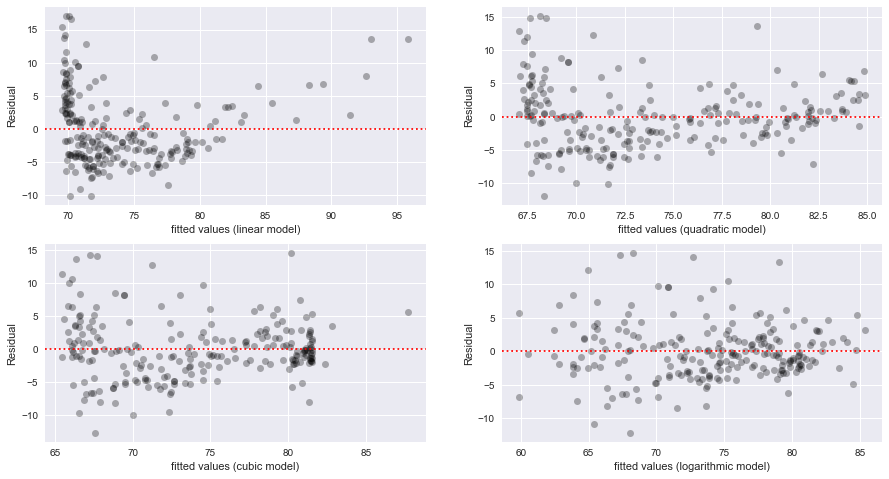

In [56]:
plt.figure(figsize=(15,8))

for i in range(len(rs)):
    plt.subplot(2, 2, i+1)
    y_pred = cs[i] @ Xs_train[i].T
    plt.plot(y_pred, rs[i], "o", alpha=0.3)
    plt.axhline(0, ls=":", color="red")
    plt.ylabel("Residual")
    plt.xlabel(f"fitted values ({model_matrix_makers[i].__name__})")

plt.show()

# Scikit-Learn

In [57]:
X_train = body[:, [4, 5]]
y_train = body[:, 0]

In [58]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

Intercept: -63.38342541094747
Coefficients: [1.30457807 0.8986582 ]


In [60]:
y_pred = lm.predict(X_train)

In [61]:
r2_score(y_train, y_pred)

0.9243996585518783